In [2]:
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
from matplotlib import colors


%matplotlib inline

In [3]:
def spec_heat_ps(energy_list, T, N):
    """Compute the specific heat per spin for an input list of energy values at temperature T and lattice sites N"""
    
    if type(energy_list) is list:
        energy_list = np.array(energy_list)
    
    c = (1/(T**2 * N)) * np.var(energy_list)
    
    return c

def sus(mag_list, T, N):
    """Compute susceptibility for an input list of magnetization values at temperature T and lattice sites N"""
    
    if type(mag_list) is list:
        mag_list = np.array(mag_list)
    
    chi = (1/(T*N)) * np.var(mag_list)
    
    return chi

In [4]:
def bootstrap_mean(values, n):
    """Uses the bootstrap method to compute the error in the mean of a given list of values"""
    
    ns = len(values)
    
    means = np.zeros(n)
    
    for i in range(n):
        samples = np.random.choice(values, ns)
        means[i] = np.mean(samples)
    
    error = np.std(means)
    
    return error
    
    
    
    
def bootstrap_c(energies, T, N, n):
    """Uses bootstrap to compute the error in the specific heat for an input set of energies"""
    
    ns = len(energies)
    
    values = np.zeros(n)
    
    for i in range(n):
        samples = np.random.choice(energies, ns)
        values[i] = spec_heat_ps(samples, T, N)
        
    error = np.std(values)
    
    return error





def bootstrap_s(magps, T, N, n):
    """Uses bootstrap to compute the error in the susceptibility for an input set of magnetization"""
    
    ns = len(magps)
    
    values = np.zeros(n)
    
    for i in range(n):
        samples = np.random.choice(magps, ns)
        values[i] = sus(samples, T, N)
    
    error = np.std(values)
    
    return error
        

In [34]:
temps = [t for t in np.arange(0.6, 1.4, 0.01)]

In [10]:
eneps_list2 = np.load('Potts2_eneps25.npy')
spec_heat2 = np.load('Potts2_spec_heat25.npy')
magps_list2 = np.load('Potts2_magps25.npy')
mag_sus2 = np.load('Potts2_magsus25.npy')
energy_dict2 = np.load('Potts2_ene_dict25.npy')[()]
mag_dict2 = np.load('Potts2_mag_dict25.npy')[()]

eneps_list4 = np.load('Potts4_eneps25.npy')
spec_heat4 = np.load('Potts4_spec_heat25.npy')
magps_list4 = np.load('Potts4_magps25.npy')
mag_sus4 = np.load('Potts4_magsus25.npy')
energy_dict4 = np.load('Potts4_ene_dict25.npy')[()]
mag_dict4 = np.load('Potts4_mag_dict25.npy')[()]

eneps_list5 = np.load('Potts5_eneps25.npy')
spec_heat5 = np.load('Potts5_spec_heat25.npy')
magps_list5 = np.load('Potts5_magps25.npy')
mag_sus5 = np.load('Potts5_magsus25.npy')
energy_dict5 = np.load('Potts5_ene_dict25.npy')[()]
mag_dict5 = np.load('Potts5_mag_dict25.npy')[()]

eneps_list10 = np.load('Potts10_eneps25v2.npy')
spec_heat10 = np.load('Potts10_spec_heat25v2.npy')
magps_list10 = np.load('Potts10_magps25v2.npy')
mag_sus10 = np.load('Potts10_magsus25v2.npy')
energy_dict10 = np.load('Potts10_ene_dict25v2.npy')[()]
mag_dict10 = np.load('Potts10_mag_dict25v2.npy')[()]

eneps_list50 = np.load('Potts50_eneps25v2.npy')
spec_heat50 = np.load('Potts50_spec_heat25v2.npy')
magps_list50 = np.load('Potts50_magps25v2.npy')
mag_sus50 = np.load('Potts50_magsus25v2.npy')
energy_dict50 = np.load('Potts50_ene_dict25v2.npy')[()]
mag_dict50 = np.load('Potts50_mag_dict25v2.npy')[()]

In [31]:
keys = list(mag_dict50.keys())

In [12]:
mag_errors2 = []

for k in keys:
    mag_errors2.append(bootstrap_mean(mag_dict2[k], 1000))
    
mag_errors2 = np.array(mag_errors2)/625

################################################

sus_errors2 = []

for k in keys:
    sus_errors2.append(bootstrap_s(mag_dict2[k], float(k), 625, 1000))
    
################################################

sh_errors2 = []

for k in keys:
    sh_errors2.append(bootstrap_c(energy_dict2[k], float(k), 625, 1000))
    
#################################################

ene_errors2 = []

for k in keys:
    ene_errors2.append(bootstrap_mean(energy_dict2[k], 1000))
    
ene_errors2 = np.array(ene_errors2)/625

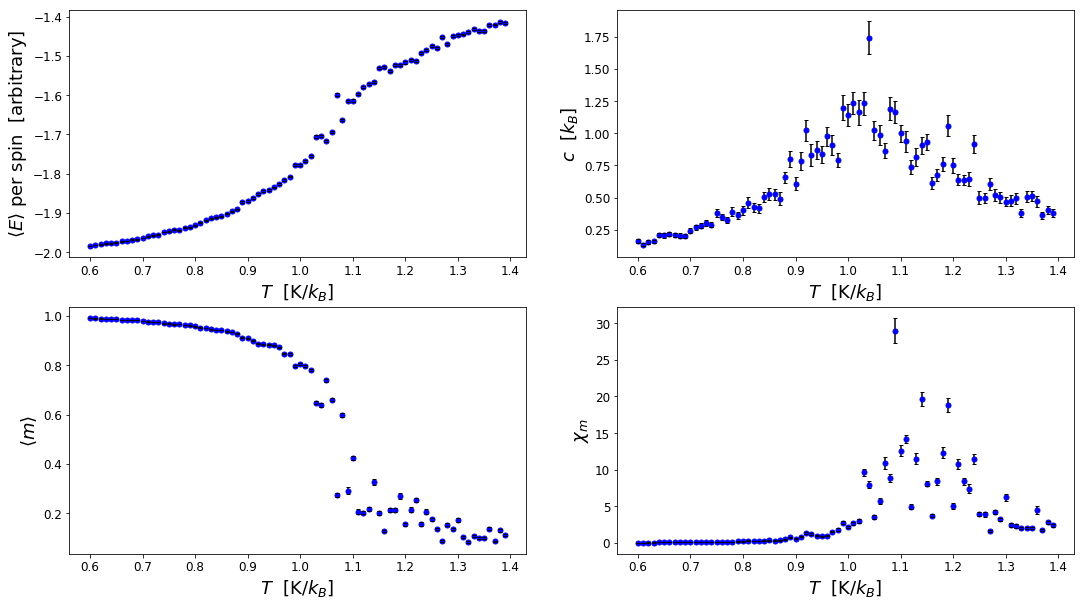

In [15]:
fig = plt.figure(figsize=(18, 10))
plt.tight_layout(pad=0, w_pad= 2, h_pad= 2)

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list2, 'bo', markersize = 5)
plt.errorbar(temps, eneps_list2, yerr = ene_errors2, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle E \rangle$ per spin  [arbitrary]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)


fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat2, 'bo', markersize = 5)
plt.errorbar(temps, spec_heat2, yerr = sh_errors2, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel("$c$  [$k_B$]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 3 )
plt.plot(temps, magps_list2, 'bo', markersize = 5)
plt.errorbar(temps, magps_list2, yerr = mag_errors2, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle m \rangle$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 4 )
plt.plot(temps, mag_sus2, 'bo', markersize = 5)
plt.errorbar(temps, mag_sus2, yerr = sus_errors2, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\chi_m$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)



plt.savefig('potts2.pdf', bbox_inches = 'tight')

In [18]:
mag_errors4 = []

for k in keys:
    mag_errors4.append(bootstrap_mean(mag_dict4[k], 1000))
    
mag_errors4 = np.array(mag_errors4)/625

################################################

sus_errors4 = []

for k in keys:
    sus_errors4.append(bootstrap_s(mag_dict4[k], float(k), 625, 1000))
    
################################################

sh_errors4 = []

for k in keys:
    sh_errors4.append(bootstrap_c(energy_dict4[k], float(k), 625, 1000))
    
#################################################

ene_errors4 = []

for k in keys:
    ene_errors4.append(bootstrap_mean(energy_dict4[k], 1000))
    
ene_errors4 = np.array(ene_errors4)/625

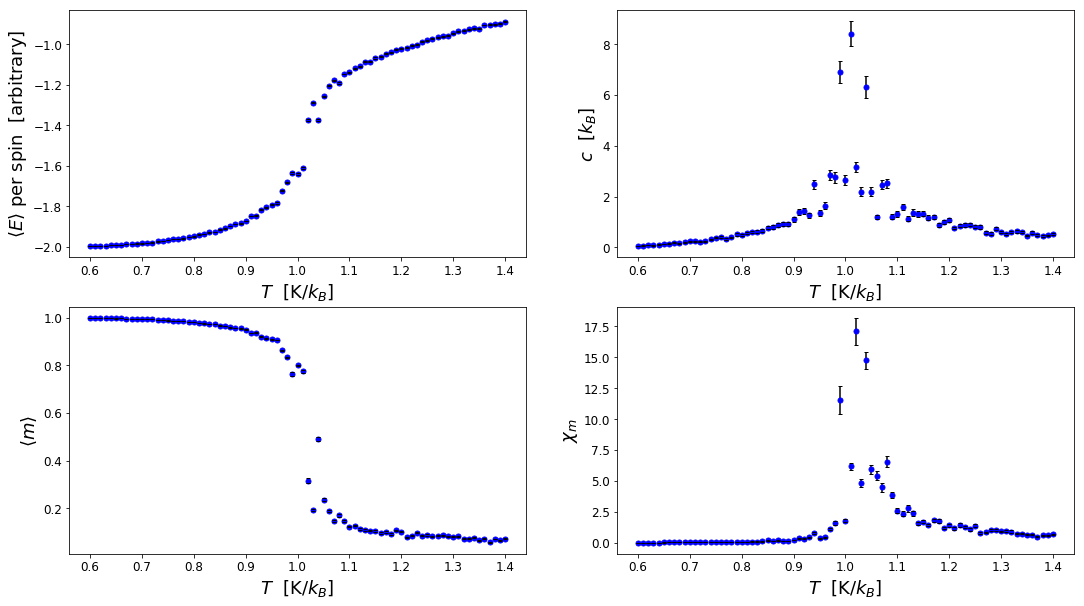

In [26]:
fig = plt.figure(figsize=(18, 10))
plt.tight_layout(pad=0, w_pad= 2, h_pad= 2)

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list4, 'bo', markersize = 5)
plt.errorbar(temps, eneps_list4, yerr = ene_errors4, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle E \rangle$ per spin  [arbitrary]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)


fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat4, 'bo', markersize = 5)
plt.errorbar(temps, spec_heat4, yerr = sh_errors4, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel("$c$  [$k_B$]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 3 )
plt.plot(temps, magps_list4, 'bo', markersize = 5)
plt.errorbar(temps, magps_list4, yerr = mag_errors4, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle m \rangle$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 4 )
plt.plot(temps, mag_sus4, 'bo', markersize = 5)
plt.errorbar(temps, mag_sus4, yerr = sus_errors4, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\chi_m$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)



plt.savefig('potts4.pdf', bbox_inches = 'tight')

In [23]:
mag_errors5 = []

for k in keys:
    mag_errors5.append(bootstrap_mean(mag_dict5[k], 1000))
    
mag_errors5 = np.array(mag_errors5)/625

################################################

sus_errors5 = []

for k in keys:
    sus_errors5.append(bootstrap_s(mag_dict5[k], float(k), 625, 1000))
    
################################################

sh_errors5 = []

for k in keys:
    sh_errors5.append(bootstrap_c(energy_dict5[k], float(k), 625, 1000))
    
#################################################

ene_errors5 = []

for k in keys:
    ene_errors5.append(bootstrap_mean(energy_dict5[k], 1000))
    
ene_errors5 = np.array(ene_errors5)/625

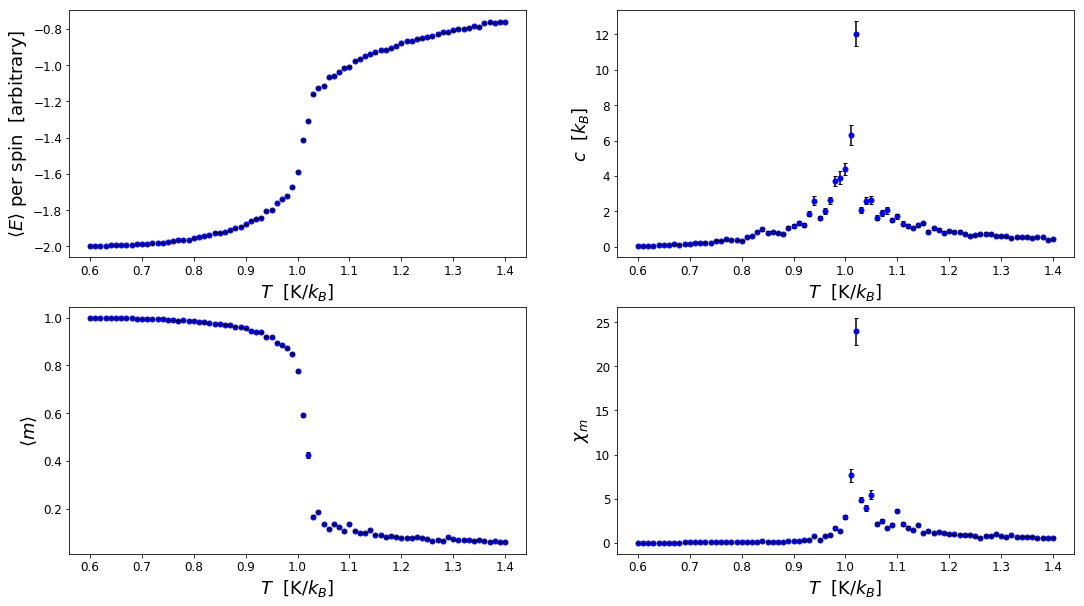

In [27]:
fig = plt.figure(figsize=(18, 10))
plt.tight_layout(pad=0, w_pad= 2, h_pad= 2)

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list5, 'bo', markersize = 5)
plt.errorbar(temps, eneps_list5, yerr = ene_errors5, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle E \rangle$ per spin  [arbitrary]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)


fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat5, 'bo', markersize = 5)
plt.errorbar(temps, spec_heat5, yerr = sh_errors5, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel("$c$  [$k_B$]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 3 )
plt.plot(temps, magps_list5, 'bo', markersize = 5)
plt.errorbar(temps, magps_list5, yerr = mag_errors5, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle m \rangle$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 4 )
plt.plot(temps, mag_sus5, 'bo', markersize = 5)
plt.errorbar(temps, mag_sus5, yerr = sus_errors5, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\chi_m$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)



plt.savefig('potts5.pdf', bbox_inches = 'tight')

In [28]:
mag_errors10 = []

for k in keys:
    mag_errors10.append(bootstrap_mean(mag_dict10[k], 1000))
    
mag_errors10 = np.array(mag_errors10)/625

################################################

sus_errors10 = []

for k in keys:
    sus_errors10.append(bootstrap_s(mag_dict10[k], float(k), 625, 1000))
    
################################################

sh_errors10 = []

for k in keys:
    sh_errors10.append(bootstrap_c(energy_dict10[k], float(k), 625, 1000))
    
#################################################

ene_errors10 = []

for k in keys:
    ene_errors10.append(bootstrap_mean(energy_dict10[k], 1000))
    
ene_errors10 = np.array(ene_errors10)/625

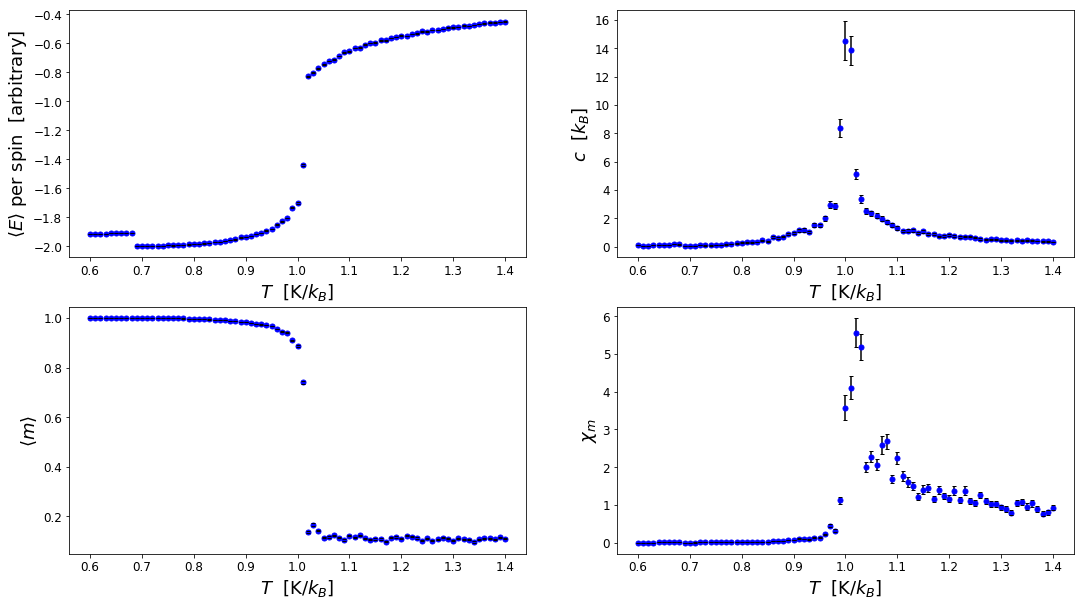

In [29]:
fig = plt.figure(figsize=(18, 10))
plt.tight_layout(pad=0, w_pad= 2, h_pad= 2)

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list10, 'bo', markersize = 5)
plt.errorbar(temps, eneps_list10, yerr = ene_errors10, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle E \rangle$ per spin  [arbitrary]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)


fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat10, 'bo', markersize = 5)
plt.errorbar(temps, spec_heat10, yerr = sh_errors10, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel("$c$  [$k_B$]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 3 )
plt.plot(temps, magps_list10, 'bo', markersize = 5)
plt.errorbar(temps, magps_list10, yerr = mag_errors10, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle m \rangle$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 4 )
plt.plot(temps, mag_sus10, 'bo', markersize = 5)
plt.errorbar(temps, mag_sus10, yerr = sus_errors10, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\chi_m$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)



plt.savefig('potts10.pdf', bbox_inches = 'tight')

In [32]:
mag_errors50 = []

for k in keys:
    mag_errors50.append(bootstrap_mean(mag_dict50[k], 1000))
    
mag_errors50 = np.array(mag_errors50)/625

################################################

sus_errors50 = []

for k in keys:
    sus_errors50.append(bootstrap_s(mag_dict50[k], float(k), 625, 1000))
    
################################################

sh_errors50 = []

for k in keys:
    sh_errors50.append(bootstrap_c(energy_dict50[k], float(k), 625, 1000))
    
#################################################

ene_errors50 = []

for k in keys:
    ene_errors50.append(bootstrap_mean(energy_dict50[k], 1000))
    
ene_errors50 = np.array(ene_errors50)/625

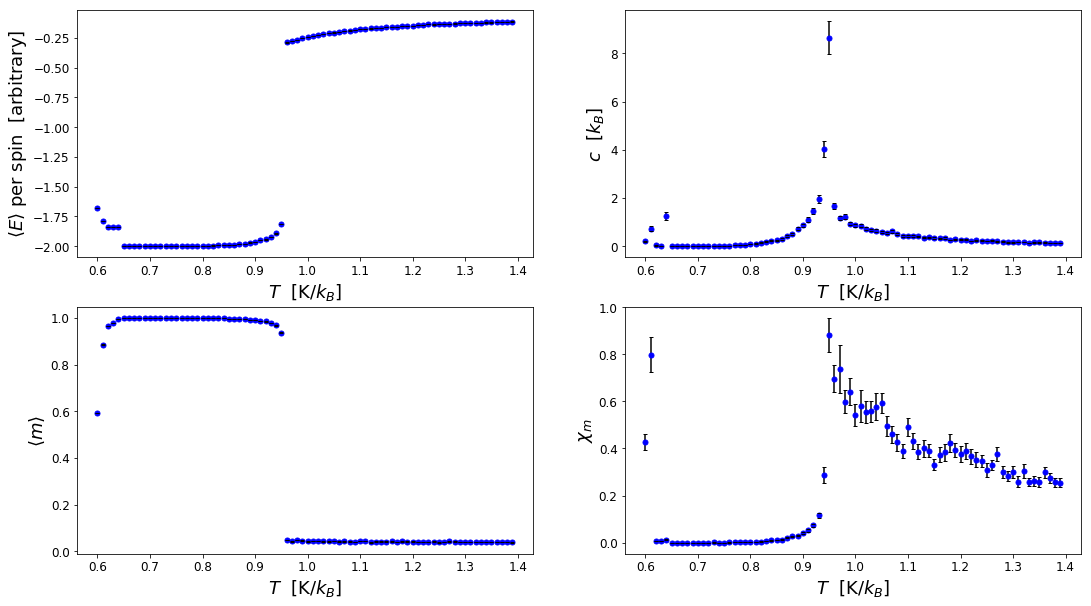

In [35]:
fig = plt.figure(figsize=(18, 10))
plt.tight_layout(pad=0, w_pad= 2, h_pad= 2)

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list50, 'bo', markersize = 5)
plt.errorbar(temps, eneps_list50, yerr = ene_errors50, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle E \rangle$ per spin  [arbitrary]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)


fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat50, 'bo', markersize = 5)
plt.errorbar(temps, spec_heat50, yerr = sh_errors50, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel("$c$  [$k_B$]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 3 )
plt.plot(temps, magps_list50, 'bo', markersize = 5)
plt.errorbar(temps, magps_list50, yerr = mag_errors50, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle m \rangle$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 4 )
plt.plot(temps, mag_sus50, 'bo', markersize = 5)
plt.errorbar(temps, mag_sus50, yerr = sus_errors50, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\chi_m$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)



plt.savefig('potts50.pdf', bbox_inches = 'tight')